In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
from config import *
import seaborn as sns
import numpy as np

install_import_path = os.path.join(tmp_dir, "files", "install_import.json")
install_import_path = r"T:\project\ReqBench\files\install_import.json"

In [9]:
%matplotlib inline

In [10]:
install_import_dict = json.load(open(install_import_path))
formatted_data = []
for pkg_name, versions in install_import_dict.items():
    for version, details in versions.items():
        formatted_data.append({
            "package": pkg_name,
            "version": version,
            **details
        })

df = pd.DataFrame(formatted_data)

In [11]:
matplotlib.rcParams["font.size"] = 20

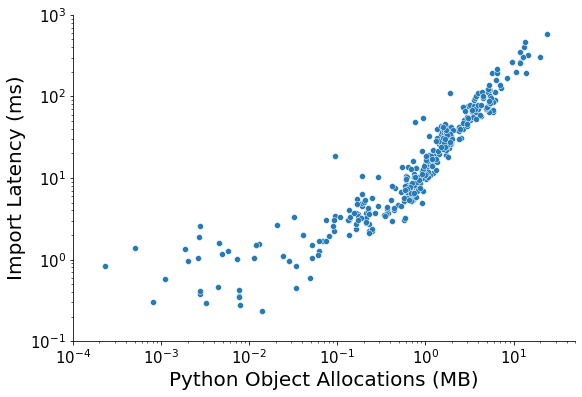

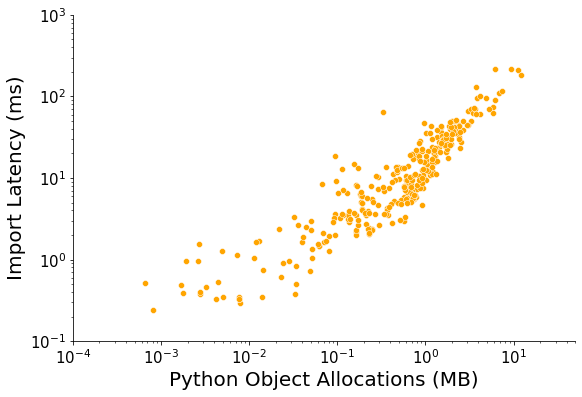

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

legend_fontsize = 15
ticks_fontsize = 15

def plot_time_mem(df, include_indirect=True, filename="plot.pdf"):
    plt.figure(figsize=(9, 6))
    if include_indirect:
        scatter_color = (38 / 255, 123 / 255, 182 / 255)
        x, y = "i-mb", "i-ms"
    else:
        scatter_color = "orange"
        x, y = "mb", "ms"
    
    ax = sns.scatterplot(data=df, x=x, y=y, color=scatter_color)
    ax.set(xscale="log", yscale="log")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(left=0.0001, right=50)
    ax.set_ylim(bottom=0.1, top=1000)
    ax.set_xlabel("Python Object Allocations (MB)")
    ax.set_ylabel("Import Latency (ms)")
    
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
    if filename:
        plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()

    
plot_time_mem(df, include_indirect=True, filename="files/time_mem_scatter.pdf")

plot_time_mem(df, include_indirect=False) 

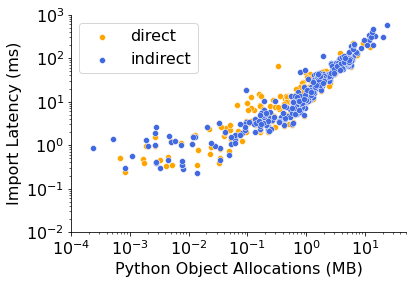

In [51]:
def plot_combined_time_mem(df):
    colors = {"direct": "orange", "indirect": "royalblue"}
    columns = {"direct": ("mb", "ms"), "indirect": ("i-mb", "i-ms")}

    ax = plt.gca() 
    ax.set(xscale="log", yscale="log")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    for key, color in colors.items():
        x, y = columns[key]
        sns.scatterplot(data=df, x=x, y=y, color=color, label=key, ax=ax)

    ax.set_xlim(left=0.0001, right=50)
    ax.set_ylim(bottom=0.01, top=1000)
    ax.set_xlabel("Python Object Allocations (MB)")
    ax.set_ylabel("Import Latency (ms)")
    plt.legend()
    plt.show()

plot_combined_time_mem(df)


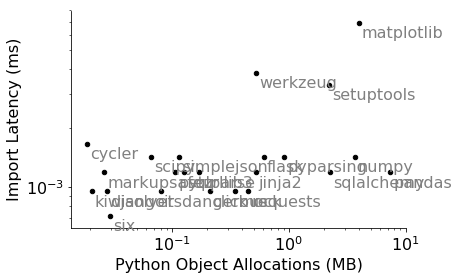

In [12]:
df = pd.read_json("costs.json").T
df.index.name = 'pkg'
df = df[(df.mb > 0) & (df.ms > 0)]
df = df.reset_index()
df.head()
ax = df.plot.scatter(x="i-mb", y="i-ms", c="black", logy=True, logx=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Python Object Allocations (MB)")
ax.set_ylabel("Import Latency (ms)")
for i in range(len(df)):
    ax.annotate(df.loc[i, "pkg"],
            xy=(df.loc[i, "i-mb"], df.loc[i, "i-ms"]), xycoords='data',
            xytext=(3, -3), textcoords='offset pixels', color='0.5',
            horizontalalignment='left', verticalalignment='top')

In [13]:
df

,pkg,i-mb,i-ms,mb,ms
0,click,0.209315,0.000954,0.200509,8.685827
1,cycler,0.018862,0.001669,0.018087,0.345945
2,django,0.027733,0.000954,0.023869,1.520395
3,flask,0.611763,0.001431,0.603521,16.710758
4,itsdangerous,0.079755,0.000954,0.098973,3.878832
5,jinja2,0.519968,0.001192,0.517416,13.332367
6,kiwisolver,0.020531,0.000954,0.011822,1.751661
7,markupsafe,0.026307,0.001192,0.013941,1.316786
8,matplotlib,3.949338,0.006914,3.980046,328.474045
9,mock,0.346139,0.000954,0.340432,13.725042
